In [1]:
options(jupyter.plot_mimetypes = c("image/png"))

suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(patchwork))
suppressPackageStartupMessages(library(ggrepel))

## For loading Arial font for publication
# library(extrafont)

# font_import(pattern = "Arial", prompt = FALSE)
# loadfonts(device = "pdf")

Warning message:
“package ‘ggrepel’ was built under R version 4.4.3”


## Percentage of actionable prescriptions

In [2]:
prescription_csv <- "resources/CPIC_total-vs-actionable_prescription_count_Dec23_Nov24.csv"
prescription_df <- read.csv(prescription_csv, sep = ",", header = TRUE, stringsAsFactors = FALSE)

prescription_df$Drug <- stringr::str_to_title(prescription_df$Drug)
prescription_df$Drug <- factor(prescription_df$Drug, levels = prescription_df$Drug)

In [3]:
head(prescription_df)

,Drug,total_prescription_count_2024,predicted_actionable_prescription_count_2024
,<fct>,<int>,<dbl>
1,Pantoprazole,713644,373255.2349
2,Atorvastatin,604106,142681.6263
3,Simvastatin,456418,107799.7281
4,Tramadol,289634,128472.4495
5,Ibuprofen,256129,18430.1794
6,Metoprolol,210995,346.6322


Warning message:
“A numeric `legend.position` argument in `theme()` was deprecated in ggplot2 3.5.0.
ℹ Please use the `legend.position.inside` argument of `theme()` instead.”


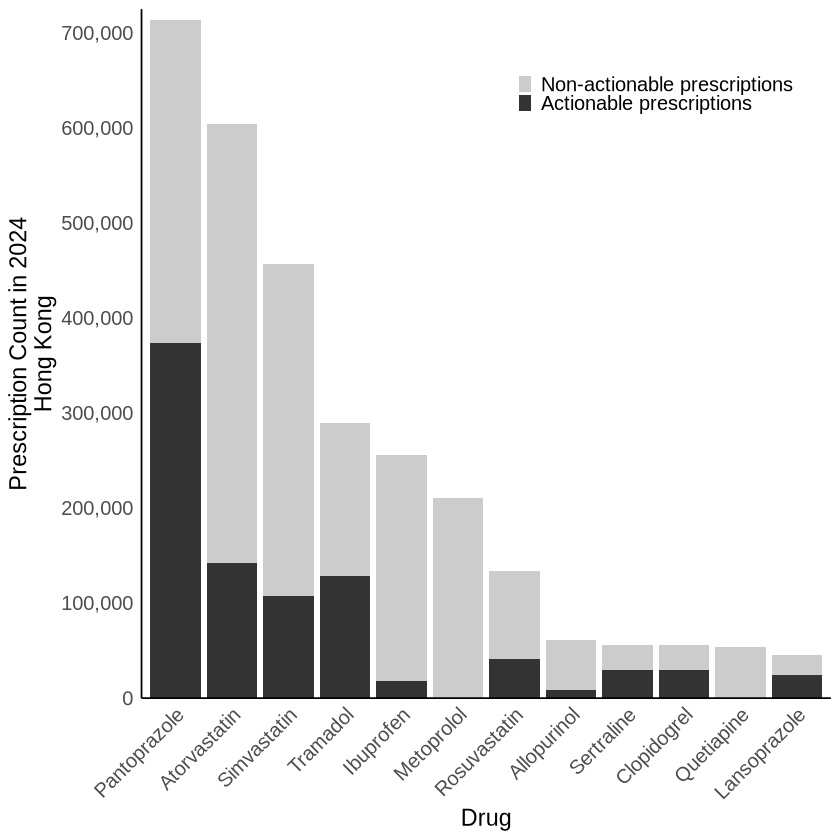

In [4]:
# Reshape the data to a long format
prescription_long <- prescription_df %>%
  select(Drug, total_prescription_count_2024, predicted_actionable_prescription_count_2024) %>%
  mutate(
    non_actionable_count = total_prescription_count_2024 - predicted_actionable_prescription_count_2024
  ) %>%
  pivot_longer(
    cols = c(non_actionable_count, predicted_actionable_prescription_count_2024),
    names_to = "Prescription_Type",
    values_to = "Count"
  )
prescription_long$Prescription_Type <- factor(
  prescription_long$Prescription_Type, 
  levels = c("non_actionable_count", "predicted_actionable_prescription_count_2024"),
  labels = c("Non-actionable prescriptions", "Actionable prescriptions")
)

# Create the stacked bar chart
grouped_bar_chart <- ggplot(prescription_long, aes(x = Drug, y = Count, fill = Prescription_Type)) +
  geom_bar(stat = "identity") +
  labs(
    title = "",
    x = "Drug",
    y = "Prescription Count in 2024\nHong Kong",
    fill = ""
  ) + 
  scale_fill_manual(
    values = c(
      "Non-actionable prescriptions" = "#CCCCCC",
      "Actionable prescriptions" = "#333333"
    )
  ) + 
  scale_y_continuous(
      labels = scales::comma_format(), 
      breaks = seq(0, 700000, by = 100000),  # Set y-axis ticks at 5% intervals
      limits = c(0, 725000),     
      expand = c(0, 0)  # Remove space at the bottom of the y-axis
  ) + 
  # theme_minimal(base_family = "Arial") +
  theme_minimal() +
  theme(
    # # Font sizes for publication
    # axis.text.y = element_text(size = 6),  # Former x-axis text, now on y-axis
    # axis.text.x = element_text(angle = 45, size = 6, hjust = 1),  # Former y-axis text, now on x-axis
    # axis.title.y = element_text(size = 7),  # Former x-axis title
    # axis.title.x = element_text(size = 7),  # Former y-axis title
    # legend.title = element_text(size = 7),
    # legend.text = element_text(size = 6),
    # Font sizes for notebook
    axis.text.y = element_text(size = 12),  # Former x-axis text, now on y-axis
    axis.text.x = element_text(angle = 45, size = 12, hjust = 1),  # Former y-axis text, now on x-axis
    axis.title.y = element_text(size = 14),  # Former x-axis title
    axis.title.x = element_text(size = 14),  # Former y-axis title
    legend.title = element_text(size = 14),
    legend.text = element_text(size = 12),

    plot.title = element_blank(),
    panel.grid = element_blank(), 
    axis.line = element_line(color = "black"), 
    legend.key.size = unit(0.3, "cm"),
    # legend.position = "none",
    legend.position = c(0.75, 0.9)
  )

# Display the plot
grouped_bar_chart


# # Export the plot to PDF    
# ggsave(
#   filename = "results/pgx/prescription_actionable_counts.pdf", 
#   plot = grouped_bar_chart, 
#   width = 60, height = 58,
#   units = "mm", dpi = 600
# )